In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Importing the dataset

In [2]:
df = pd.read_csv("/Users/vij/Desktop/Telco-Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- The **SeniorCitizen** column represents a **categorical variable** (0 = No, 1 = Yes), meaning **percentile-based distribution** (25%-50%-75%) isn’t meaningful for analysis. Only **16.2%** of the customers fall into this category.  
- Regarding **tenure**, **75%** of customers have been subscribed for **less than 55 months**, with an **average tenure** of **32 months**. However, **some customers** have remained for as long as **72 months (6 years)**, showing **significant variability**.  
- For **MonthlyCharges**, the **average bill** stands at **\$64.76**, but pricing **varies widely**. While **half of the customers** pay **\$70.35 or less**, the **top 25\%**  are billed **over \$89.85 per month**. The **highest monthly charge** reaches **$118.75**, which is **significantly above the average**.  

## Checking for any missing values

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Check Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

## Data Cleaning and Preprocessing

In [10]:
# TotalCharges is stored as an object; it needs conversion
df['TotalCharges'] =  pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df.dropna(inplace=True, how ="all")

In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Categorize customers into groups based on their tenure. For example, assign a tenure group of 1-12 for customers with a tenure of less than 12 months, 13-24 for those with a tenure between 1 and 2 years, and continue grouping in a similar manner.**

In [15]:
df["tenure"].max()

np.int64(72)

In [16]:
# Define bins explicitly to match the required number of labels
bins = [1, 13, 25, 37, 49, 61, 73]  # 7 bin edges
labels = ["1-12", "13-24", "25-36", "37-48", "49-60", "61-72"]  # 6 labels

df["tenure_group"] = pd.cut(df["tenure"], bins=bins, right=False, labels=labels)

In [17]:
df["tenure_group"].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [19]:
df.drop(columns=["customerID"],axis=1,inplace=True)

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Exploration

## Univariate Analysis & Bivariate Analysis

In [21]:
churn_count = df['Churn'].value_counts()

In [22]:
churn_count

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [23]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

Text(0, 0.5, 'Count')

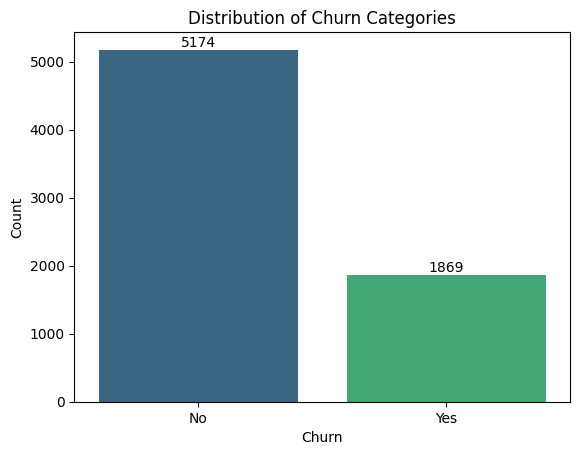

In [24]:
ax = sns.barplot(data=churn_count,palette="viridis")
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Distribution of Churn Categories")
plt.xlabel("Churn")
plt.ylabel("Count")

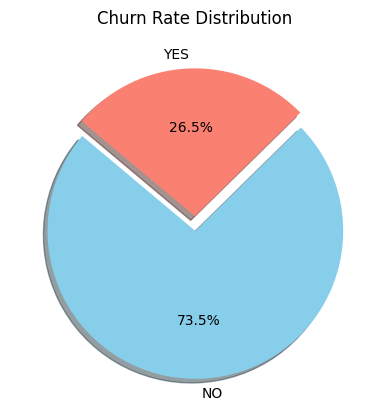

In [25]:
labels= ["NO","YES"]
plt.pie(churn_count,labels=labels, startangle=140, autopct="%1.1f%%", colors=['skyblue', 'salmon'],explode=(0.1,0), shadow=True)
plt.title("Churn Rate Distribution")
plt.show()

The dataset reveals a notable imbalance in the target variable, with 73% of customers retaining their subscription and only 27% churning. Due to this disparity, it is essential to analyze other features in relation to the target variable separately to identify meaningful patterns and insights.

In [26]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1-12
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,13-24
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,1-12
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25-36
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,61-72


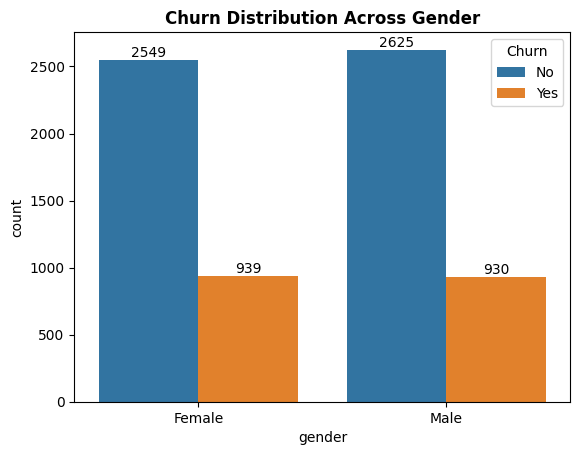

In [27]:
ax = sns.countplot(data=df, x=df['gender'], hue='Churn')
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Churn Distribution Across Gender", fontweight="bold")
plt.show()

- There is almost no significant difference between both the gender.

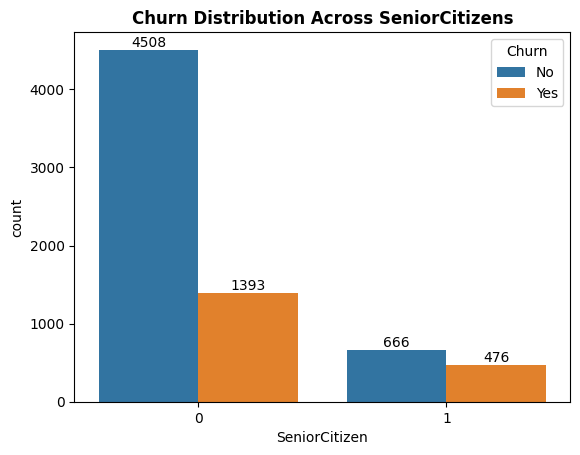

In [28]:
ax = sns.countplot(data=df, x=df['SeniorCitizen'], hue='Churn')
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Churn Distribution Across SeniorCitizens", fontweight="bold")
plt.show()

- Senior citizens (1) represent a smaller portion of the customer base, but their churn rate is significantly higher.
    - Nearly 42% of senior customers churned.
    - In contrast, only about 24% of non-senior customers churned.

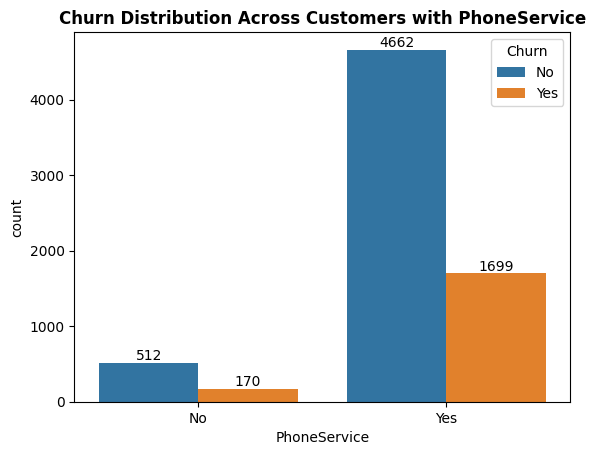

In [29]:
ax = sns.countplot(data=df, x=df['PhoneService'], hue='Churn')
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Churn Distribution Across Customers with PhoneService", fontweight="bold")
plt.show()

- The majority of customers have phone service.
- The churn rate is fairly similar for both groups:
  - Customers with phone service churned at about 26.7%.
  - Customers without phone service churned at about 25.0%.
- This indicates that phone service is not a major driver of churn—customers leave at nearly the same rate whether they use this service or not.



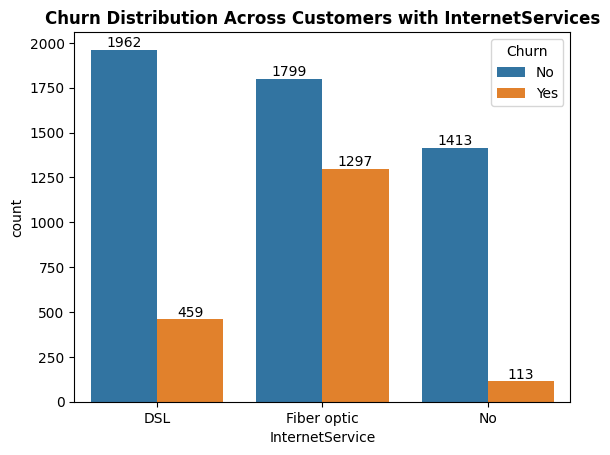

In [30]:
ax = sns.countplot(data=df, x=df['InternetService'], hue='Churn')
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Churn Distribution Across Customers with InternetServices", fontweight="bold")
plt.show()

- Fiber optic users have the highest churn rate at nearly 42%. This could indicate dissatisfaction related to pricing, performance, or service issues.
- DSL users show much lower churn at around 19%, possibly reflecting more stable expectations or lower costs.
- Customers with no internet service churn the least (only 7.4%). These customers might be lower engagement users or may rely on other services like phone/TV.

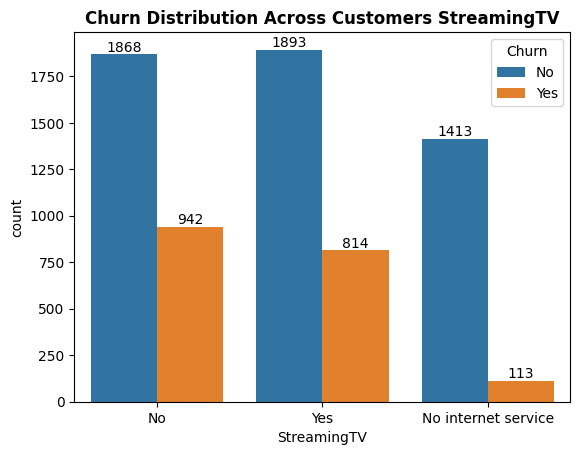

In [31]:
ax = sns.countplot(data=df, x=df['StreamingTV'], hue='Churn')
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Churn Distribution Across Customers StreamingTV", fontweight="bold")
plt.show()

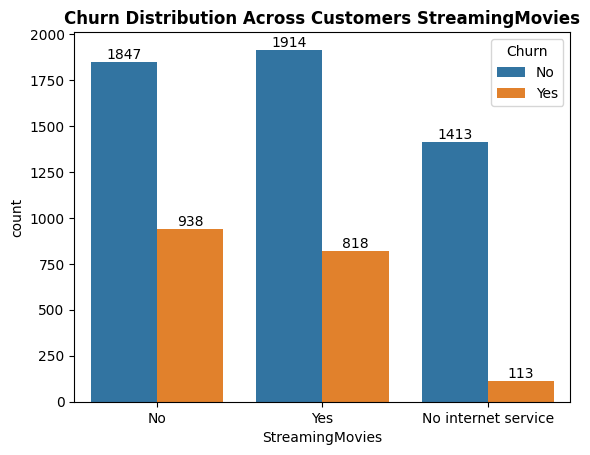

In [32]:
ax = sns.countplot(data=df, x=df['StreamingMovies'], hue='Churn')
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Churn Distribution Across Customers StreamingMovies", fontweight="bold")
plt.show()

- Both StreamingTV and StreamingMovies show a modest positive influence on retention. While the difference isn’t drastic, customers engaged in streaming services seem less likely to churn than those who are not.

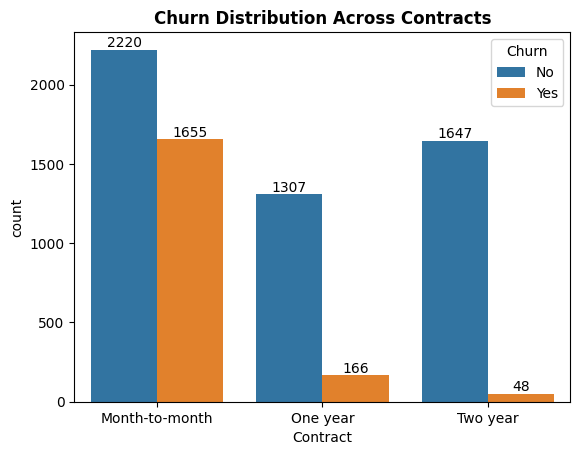

In [33]:
ax = sns.countplot(data=df, x=df['Contract'], hue='Churn')
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Churn Distribution Across Contracts", fontweight="bold")
plt.show()

- Highest churn occurs in month-to-month contracts:
    - These customers are the most flexible and thus most likely to leave.
    - Churn rate is very high (~42.7%), indicating a need for better engagement, loyalty programs, or incentives to convert these        users into long-term customers.
- Churn drastically reduces for longer contracts:
    - One-year contracts: churn drops to ~11.3%.
    - Two-year contracts: churn is extremely low (~2.8%).
- This shows that longer commitment leads to better retention, possibly due to better deals & discounts.

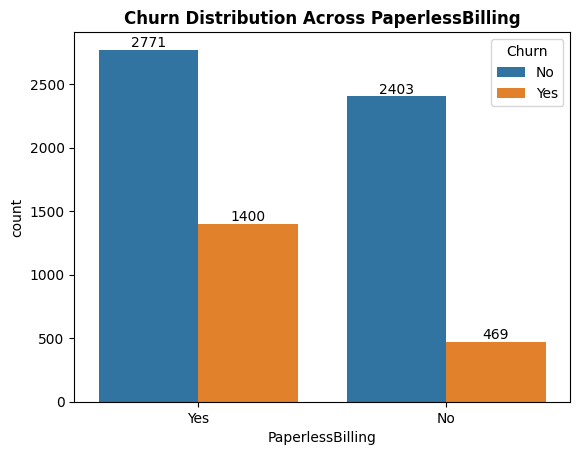

In [34]:
ax = sns.countplot(data=df, x=df['PaperlessBilling'], hue='Churn')
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Churn Distribution Across PaperlessBilling", fontweight="bold")
plt.show()

- Customers who opt for Paperless Billing seem to have a higher churn rate compared to those who do not.
This might indicate issues like reduced customer engagement, confusion in billing, or dissatisfaction with digital communication channels.

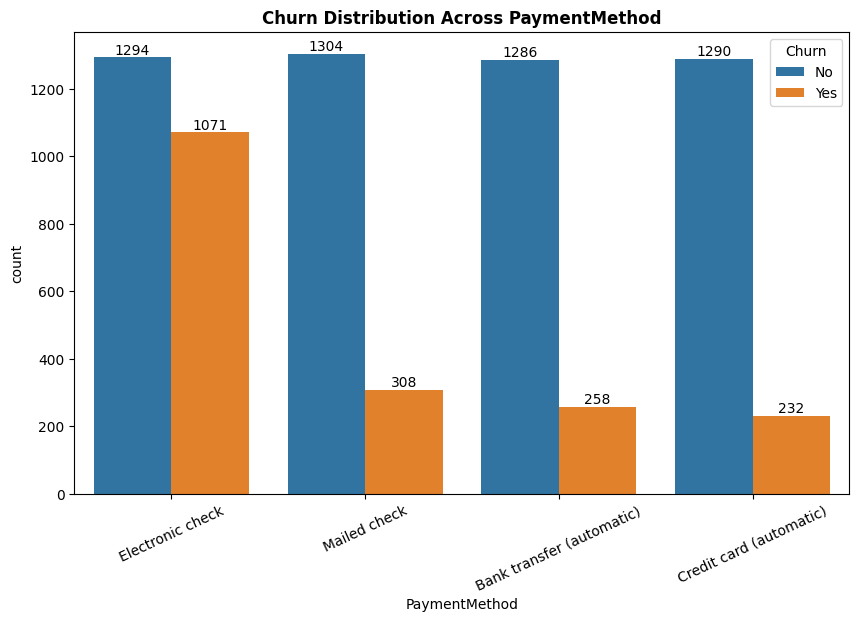

In [35]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x=df['PaymentMethod'], hue='Churn')
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Churn Distribution Across PaymentMethod", fontweight="bold")
plt.xticks(rotation=25)
plt.show()

- Customers using electronic checks are significantly more likely to churn than those using automatic payment methods.
This suggests that automated payments (bank transfers and credit cards) may contribute to better customer retention, likely due to added convenience or fewer missed payments.

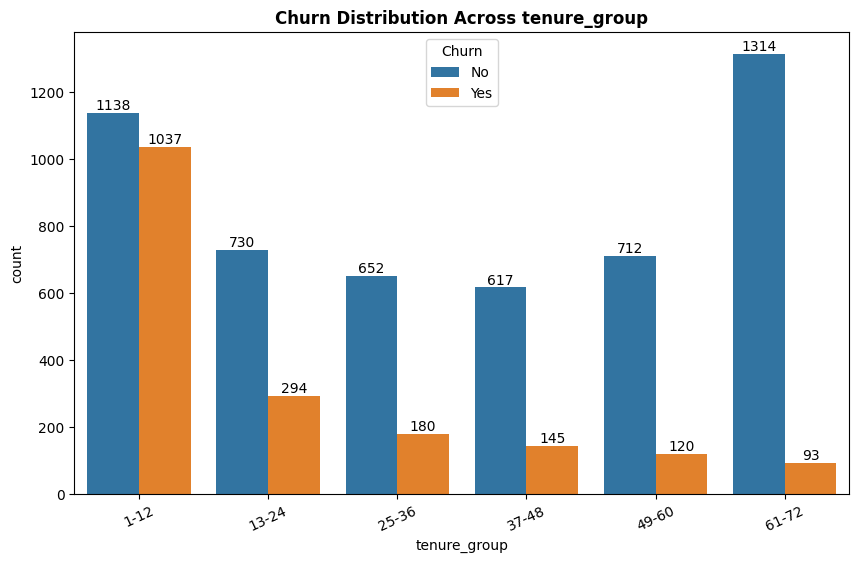

In [36]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x=df['tenure_group'], hue='Churn')
for containers in ax.containers:
    ax.bar_label(containers)
plt.title("Churn Distribution Across tenure_group", fontweight="bold")
plt.xticks(rotation=25)
plt.show()

- Customers with higher tenure rarely churn.
- New customers with less than a year of tenure churn the most.

# Summary of the Data analysed 

**1.Churn Rate:**
- About 26.5% customers have left — that’s pretty high and something to worry about.

**2.Who’s Leaving More:**
- Senior citizens are more likely to churn.
- Gender doesn’t seem to matter much.

**3.Tenure Insight:**
- People with less than a year with the company leave the most.
- Long-time customers usually stay loyal.

**4.Contract Type:**
- Month-to-month plans have the highest churn.
- One or two-year contracts are much more stable.

**5.Internet Service:**
- Fiber optic customers leave more compared to DSL or no-internet users. Probably due to cost or service issues.

**6.Charges Factor:**
- Customers paying higher monthly charges churn more.
- But those with high total charges (been around longer) usually stay.

**7.Payments:**
- Electronic checks are linked to more churn.
- Auto-pay methods seem to help keep customers.

# Machine Learning

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
print(df.dtypes)

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
tenure_group        category
dtype: object


In [39]:
data = df.copy()

# Feature Engineering

In [40]:
data['Churn']= data['Churn'].map({'Yes':1, 'No':0})
# encoding the target variable

In [41]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [42]:
binary_cols = ['gender', 'SeniorCitizen', 'Dependents', 'Partner', 'PhoneService', 'PaperlessBilling']
le = LabelEncoder()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])
# label encoding the binary variables

In [43]:
multiclass_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                   'StreamingMovies', 'MultipleLines', 'InternetService', 'Contract', 
                   'PaymentMethod', 'tenure_group']

data = pd.get_dummies(data, columns=multiclass_cols, drop_first=True, dtype=np.int32)
# encoding the remaining variables using one-hot encoding

In [44]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [45]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
# oversampling minority class

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
#splitting the training and testing data

In [47]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [48]:
clf.fit(X_train, y_train)
# training the model

RandomForestClassifier(random_state=0)

In [49]:
y_pred = clf.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[856 177]
 [ 49 988]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.88      1033
           1       0.85      0.95      0.90      1037

    accuracy                           0.89      2070
   macro avg       0.90      0.89      0.89      2070
weighted avg       0.90      0.89      0.89      2070


Accuracy: 0.8908212560386474


## Model Evaluation Interpretation

- **Accuracy** of the model is **89%**, indicating strong overall performance.
- **Class 0 (No Churn)**:
  - **Precision**: 94% — When the model predicts a customer will *not churn*, it's right 94% of the time.
  - **Recall**: 83% — The model correctly identifies 83% of customers who actually did *not churn*.
- **Class 1 (Churn)**:
  - **Precision**: 85% — When the model predicts a customer will *churn*, it's correct 85% of the time.
  - **Recall**: 95% — The model correctly identifies 95% of customers who actually *churned*.